In [1]:
# Convolutional Neural Network

In [2]:
# Importing the Keras libraries and packages
import keras

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [4]:
# Initializing the CNN
classifier = Sequential()

In [5]:
# Step 1: Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  


In [6]:
# Step 2: Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [7]:
# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


In [8]:
# Step 3: Flattening
classifier.add(Flatten())

In [9]:
#  Step 4: Full Connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [11]:
# Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

classifier.fit_generator(training_set,
                         steps_per_epoch=8000,
                         epochs=25,
                         validation_data=test_set,
                         validation_steps=2000,
                         verbose=1)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
250/250 [==============================] - 54s 216ms/step - loss: 0.6771 - acc: 0.5850 - val_loss: 0.6510 - val_acc: 0.6305
Epoch 2/5
250/250 [==============================] - 40s 159ms/step - loss: 0.6230 - acc: 0.6558 - val_loss: 0.5786 - val_acc: 0.7085
Epoch 3/5
250/250 [==============================] - 42s 168ms/step - loss: 0.5690 - acc: 0.7060 - val_loss: 0.5494 - val_acc: 0.7280
Epoch 4/5
250/250 [==============================] - 41s 165ms/step - loss: 0.5352 - acc: 0.7310 - val_loss: 0.5065 - val_acc: 0.7460
Epoch 5/5
250/250 [==============================] - 53s 212ms/step - loss: 0.5074 - acc: 0.7498 - val_loss: 0.5051 - val_acc: 0.7535


In [14]:
# Importing the libraries
from IPython.display import Image
import numpy as np

In [17]:
# Making the user entered image prediction
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

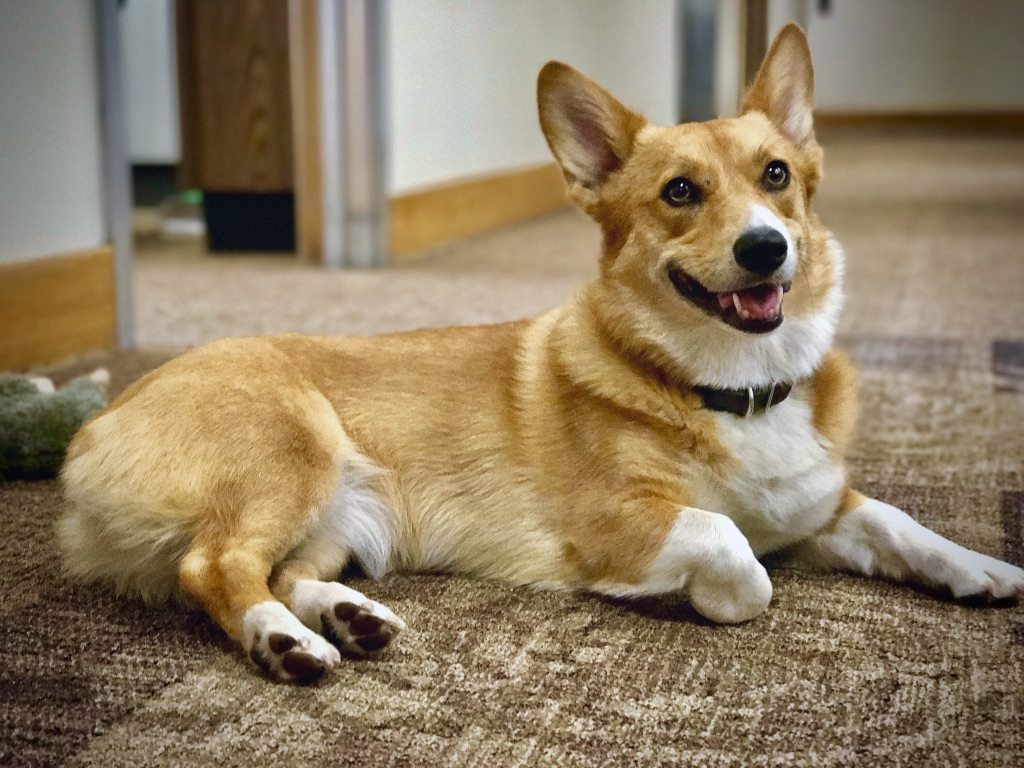

In [21]:
Image('dataset/single_prediction/cat_or_dog_2.jpg')

In [23]:
print("The above image is of a", prediction, "according to our CNN")

The above image is of a dog according to our CNN


In [ ]:
print("The accuracy of our CNN is:")